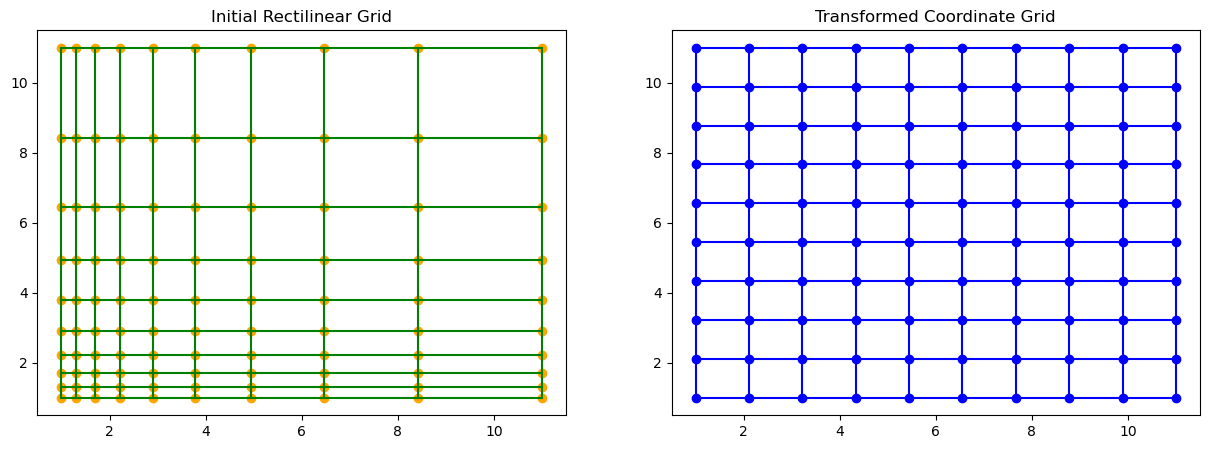

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Create initial 2D meshgrid with np.linspace
x_lin = np.linspace(1, 11, 10)
y_lin = np.linspace(1, 11, 10)
X_lin, Y_lin = np.meshgrid(x_lin, y_lin)

# Create transformed 2D meshgrid with np.geomspace
x_geom = np.geomspace(1, 11, 10)
y_geom = np.geomspace(1, 11, 10)
X_geom, Y_geom = np.meshgrid(x_geom, y_geom)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot transformed meshgrid
axs[0].scatter(X_geom, Y_geom, color="orange")
for x in x_geom:
    axs[0].plot([x, x], [1, 11], color="green")

for y in y_geom:
    axs[0].plot([1, 11], [y, y], color="green")

axs[0].set_title("Initial Rectilinear Grid")

# Plot initial meshgrid
axs[1].scatter(X_lin, Y_lin, color="blue")
for x in x_lin:
    axs[1].plot([x, x], [1, 11], color="blue")

for y in y_lin:
    axs[1].plot([1, 11], [y, y], color="blue")

axs[1].set_title("Transformed Coordinate Grid")

plt.savefig("BilinearInterpolation.svg")
plt.savefig("BilinearInterpolation.pdf")
plt.show()

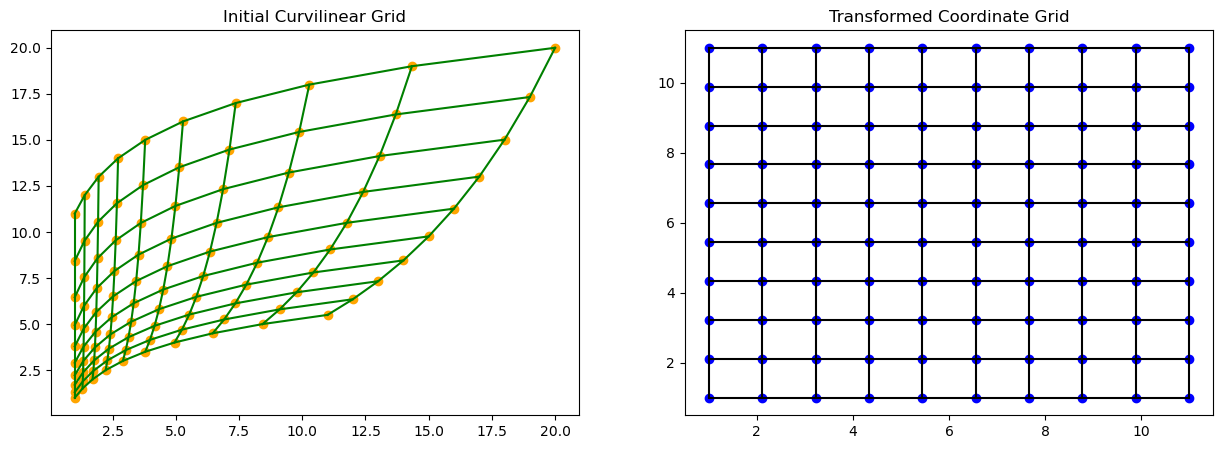

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Create transformed 2D meshgrid with np.geomspace
X_geom = np.zeros((10, 10))
Y_geom = np.zeros((10, 10))

for i in range(X_geom.shape[0]):
    X_geom[i, :] = np.geomspace(1, 11 + i, 10)

for j in range(Y_geom.shape[1]):
    Y_geom[:, j] = np.geomspace(1 + 0.5 * j, 11 + j, 10)

# Create initial 2D meshgrid with np.linspace
x_lin = np.linspace(1, 11, 10)
y_lin = np.linspace(1, 11, 10)
X_lin, Y_lin = np.meshgrid(x_lin, y_lin)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot the transformed grid
ax[0].scatter(X_geom, Y_geom, color="orange")
ax[0].plot(X_geom, Y_geom, color="green")
ax[0].plot(X_geom.T, Y_geom.T, color="green")
ax[0].set_title("Initial Curvilinear Grid")

# Plot the initial grid
ax[1].scatter(X_lin, Y_lin, color="blue")
ax[1].plot(X_lin, Y_lin, color="black")
ax[1].plot(X_lin.T, Y_lin.T, color="black")
ax[1].set_title("Transformed Coordinate Grid")

plt.savefig("CurvilinearInterpolation.svg")
plt.savefig("CurvilinearInterpolation.pdf")
plt.show()

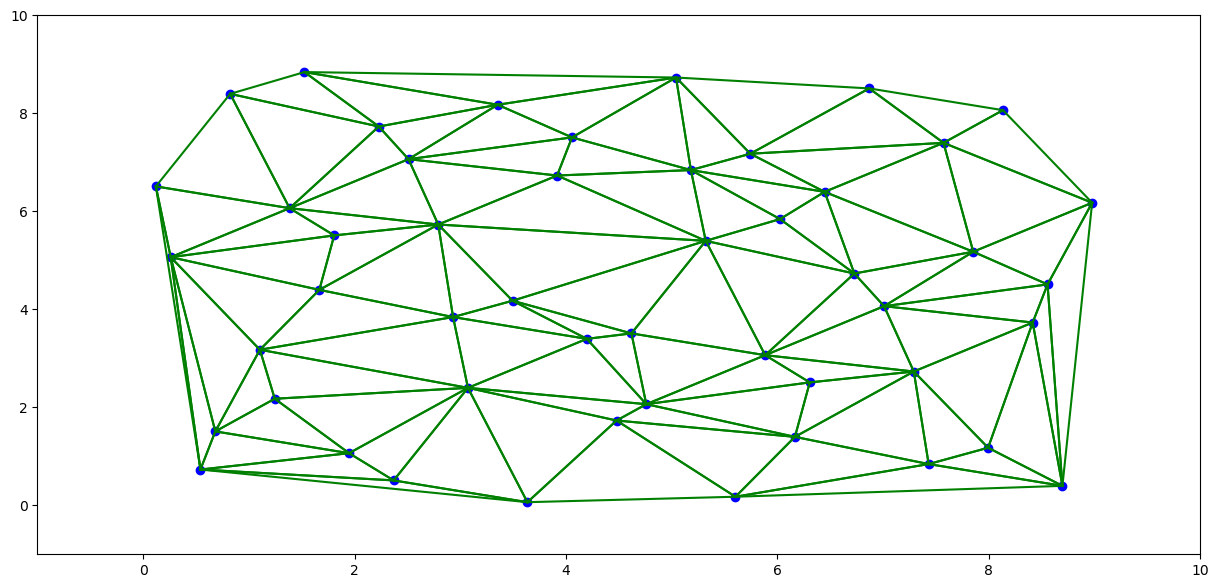

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import Delaunay
from scipy.stats import qmc  # Import the quasi-Monte Carlo module

# Generate quasi-Monte Carlo points (Halton sequence)
sampler = qmc.Halton(2, seed=1)  # 2 for 2D
points = 9 * sampler.random(50)  # Scale to fit within the 9x9 grid
x_coords = points[:, 0]
y_coords = points[:, 1]

# Delaunay triangulation
tri = Delaunay(points)

fig, ax = plt.subplots(figsize=(15, 7))

# Plot the points
ax.scatter(x_coords, y_coords, color="blue")

# Plot the Delaunay triangulation
for simplex in tri.simplices:
    for i in range(3):
        for j in range(i + 1, 3):
            start = points[simplex[i]]
            end = points[simplex[j]]
            ax.plot([start[0], end[0]], [start[1], end[1]], color="green")

ax.set_xlim(-1, 10)
ax.set_ylim(-1, 10)

plt.savefig("UnstructuredInterpolation.svg")
plt.savefig("UnstructuredInterpolation.pdf")
plt.show()